<a href="https://colab.research.google.com/github/kumarrah2002/Fractal_Generator_GPU/blob/main/generator/mandelbrotZoomGIF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



## **Import Dependencies**

In [206]:
from matplotlib import pyplot as plt
import numpy as np
from timeit import default_timer as timer
import os
import imageio
from numba import njit
from functools import partial



## **Now, we will be expanding on the code from mandelbrotGIF.ipynb to be able to zoom in extensively into a Mandelbrot Fractal**

In [183]:

class mandelbrot:
  def __init__(self, cmap):
    self.cmap = cmap

  '''
  Args:
    cmap (str): color map of Mandelbrot Fractal
  '''

  def f(self, z, c):
    return z**(self.k) + c

  '''
  ------------------------------------------------------------------------------
  Args:
    z (float): critical point in complex plane
    c (float): complex number to change z
  ------------------------------------------------------------------------------
  '''

  def diverge(self, c, z = 0, iterations = 20):
    c = complex(*c)
    z = 0
    for i in range(iterations):
      if(z.real*z.real + z.imag*z.imag) >= 4:
        return i
      z = self.f(z, c)
    return 0

  '''
  ------------------------------------------------------------------------------
  Args:
    z (float): critical point in complex plane
    c (float): complex number
    iterations (int): Number of repetitions 
  ------------------------------------------------------------------------------
  '''

  def plot(self, k, complex_plane, div):
    self.k = k
    xmin, xmax, ymin, ymax = complex_plane
    resolution = 200 #200 points between minimum and maximum

    xx, yy = np.meshgrid(np.linspace(xmin, xmax, resolution), 
                        np.linspace(ymin, ymax, resolution))
    points = np.c_[xx.ravel(), yy.ravel()]
    mandelbrot_points = [div(c) for c in points]
    mandelbrot_points = np.array(mandelbrot_points).reshape(200, 200)
    plt.contourf(mandelbrot_points, cmap = self.cmap)

  '''
  ------------------------------------------------------------------------------
  Args:
    k (float): power of z --> used to create varying fractal shapes
    complex_plane (tuple): starting and ending values on the complex plane
      format: (xmin, xmax, ymin, ymax)
    div (functools.partial): creates new function that passes a new value for iterations variable  
  ------------------------------------------------------------------------------
  '''

  def gif(self, lower, upper,  iterations):
    if (lower >= 2):
      os.mkdir("mandelbrot_plots")
      series = np.linspace(lower, upper, iterations)
      for n in series:
        self.plot(n)
        plt.savefig(f"mandelbrot_plots/mandelbrot_{n}.jpg")
    
      gif = [] 
      files = [f"mandelbrot_plots/mandelbrot_{n}.jpg" for n in series]
      for image in files:
        gif.append(imageio.imread(image))
      imageio.mimsave('mandelbrot.gif', gif)
    
    else:
      print("Input a higher lower boundary")

  '''
  ------------------------------------------------------------------------------
  Args:
    lower (float): lowest value of k for the equation z**k + c
    upper (float): highest value of k for the equation z**k + c
    iterations (int): Number of repetitions 
  ------------------------------------------------------------------------------
  '''

  def zoom(self, complex_plane, focal_point, factor = 2):
    x, y = focal_point
    factor = factor*2
    x_min, x_max, y_min, y_max = complex_plane
    width = (x_max - x_min) / factor
    height = (y_max - y_min) / factor

    return x-width, x+width, y-height, y+height

  '''
  ------------------------------------------------------------------------------
  Args:
    complex_plane (tuple): starting and ending values on the complex plane
      format: (xmin, xmax, ymin, ymax)
    focal_point (tuple): coordinate of center of focus for zooming into fractal
    factor (float): Zoom-in rate  
  ------------------------------------------------------------------------------
  '''

**You can choose whatever shader you want for the fractal!**


All the colormaps can be found using this link: https://matplotlib.org/stable/tutorials/colors/colormaps.html

Mandelbrot GIF created in 0.323386 sec.


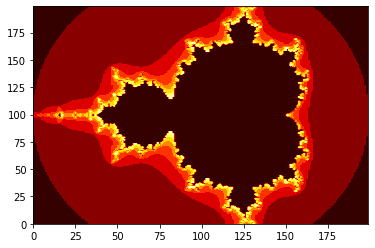

In [184]:
complex_plane = (-2, 1, -1, 1)
plot1 = mandelbrot(cmap = "hot")
div = partial(plot1.diverge, iterations = 20)

start = timer()

plot1.plot(2, complex_plane, div)

end = timer() - start
print("Mandelbrot GIF created in %f sec." % end)

**Open mandelbrot.gif under the mandelbrot_plots and look at your stunning Mandelbrot Fractal GIF!**

Mandelbrot Zoom GIF created in 153.967313 sec.


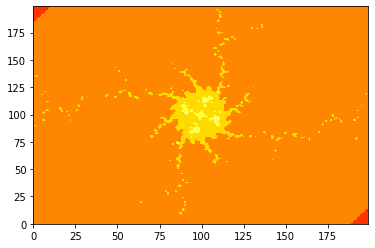

In [203]:
point = (-1.24254013716898265806, 0.413238151606368092027)
complex_plane = (-2, 1, -1, 1)
k = 2
div = partial(plot1.diverge, iterations = 150)
os.mkdir("mandelbrot_zoom")

zoom = 120

start = timer()

for i in range(zoom):
  complex_plane = plot1.zoom(complex_plane, point, factor = 1.25)
  plot1.plot(k, complex_plane, div)
  plt.savefig(f"mandelbrot_zoom/mandelbrot_{i}.jpg")

end = timer() - start

gif = [] 
files = [f"mandelbrot_zoom/mandelbrot_{i}.jpg" for i in range(zoom)]
for image in files:
  gif.append(imageio.imread(image))
imageio.mimsave('mandelbrot_zoom.gif', gif)

print("Mandelbrot Zoom GIF created in %f sec." % end)


In [202]:
import shutil

if (os.path.exists("/content/mandelbrot_plots") == True):
  shutil.rmtree("/content/mandelbrot_plots")
elif (os.path.exists("/content/mandelbrot_zoom") == True):
  shutil.rmtree("/content/mandelbrot_zoom")
elif (os.path.exists("/content/mandelbrot_zoom.gif") == True):
  os.remove("mandelbrot_zoom.gif")
elif (os.path.exists("/content/mandelbrot.gif") == True):
  os.remove("mandelbrot.gif")


# To remove the mandelbrot fractal images and create another GIF, uncomment and run the code above